Section 12

[Udemy](https://www.udemy.com/course/automate/learn/lecture/3470582#overview)

[Online Book - Chapter 10](https://automatetheboringstuff.com/chapter10/)

# LESSON 35: Raise and Assert Statements

In [1]:
42/0

ZeroDivisionError: division by zero

In [2]:
raise Exception('You cannot divide an integer by zero')

Exception: You cannot divide an integer by zero

In [22]:
def boxPrint(symbol, width, height):
    
    print(symbol * width)
    
    for i in range(height):
        print(symbol + (' ' * (width - 2)) + symbol)
    
    print(symbol * width)

In [23]:
boxPrint('*', 16, 1)

****************
*              *
****************


In [29]:
boxPrint('+', 16, 3)

++++++++++++++++
+              +
+              +
+              +
++++++++++++++++


### Exception if symbol entered is more than 1 string

In [24]:
def boxPrint(symbol, width, height):
    if len(symbol) != 1:
        raise Exception('Symbol needs to be a string length of 1')
    
    print(symbol * width)
    
    for i in range(height):
        print(symbol + (' ' * (width - 2)) + symbol)
    
    print(symbol * width)

In [25]:
boxPrint('**', 10, 1)

Exception: Symbol needs to be a string length of 1

### Write error message to a text file

In [30]:
import traceback

In [33]:
try: 
    raise Exception('This is the ERROR MESSAGE!')
except:
    errorFile = open('error_log.txt', 'a')
    errorFile.write(traceback.format_exc())
    errorFile.close()
    print('The traceback info was written to error_log.txt')

The traceback info was written to error_log.txt


In [34]:
try: 
    raise Exception('This is the ERROR MESSAGE!')
except:
    errorFile = open('error_log.txt', 'a')
    errorFile.write(traceback.format_exc())
    errorFile.close()
    print('The traceback info was written to error_log.txt')

The traceback info was written to error_log.txt


### Assertion Check, aka Sanity Check

Another kind of Exception

I assert that this statement is always TRUE, if not there's a bug.

Unlike Exceptions, Assertions is a programmer's error.

In [35]:
assert False, 'This is the error message'

AssertionError: This is the error message

### Program: Simulate Traffic Lights

In [45]:
market_2nd = {
    'ns': 'green',
    'ew': 'red'
}

def switchLights(intersection):
    for key in intersection.keys():
        if intersection[key] == 'green':
            intersection[key] = 'yellow'
        elif intersection[key] == 'yellow':
            intersection[key] = 'red'
        elif intersection[key] == 'red':
            intersection[key] = 'green'

In [46]:
print(market_2nd)
switchLights(market_2nd)

{'ns': 'green', 'ew': 'red'}


In [47]:
print(market_2nd)

{'ns': 'yellow', 'ew': 'green'}


Screen Shot 2019-10-16 at 12.04.43 AM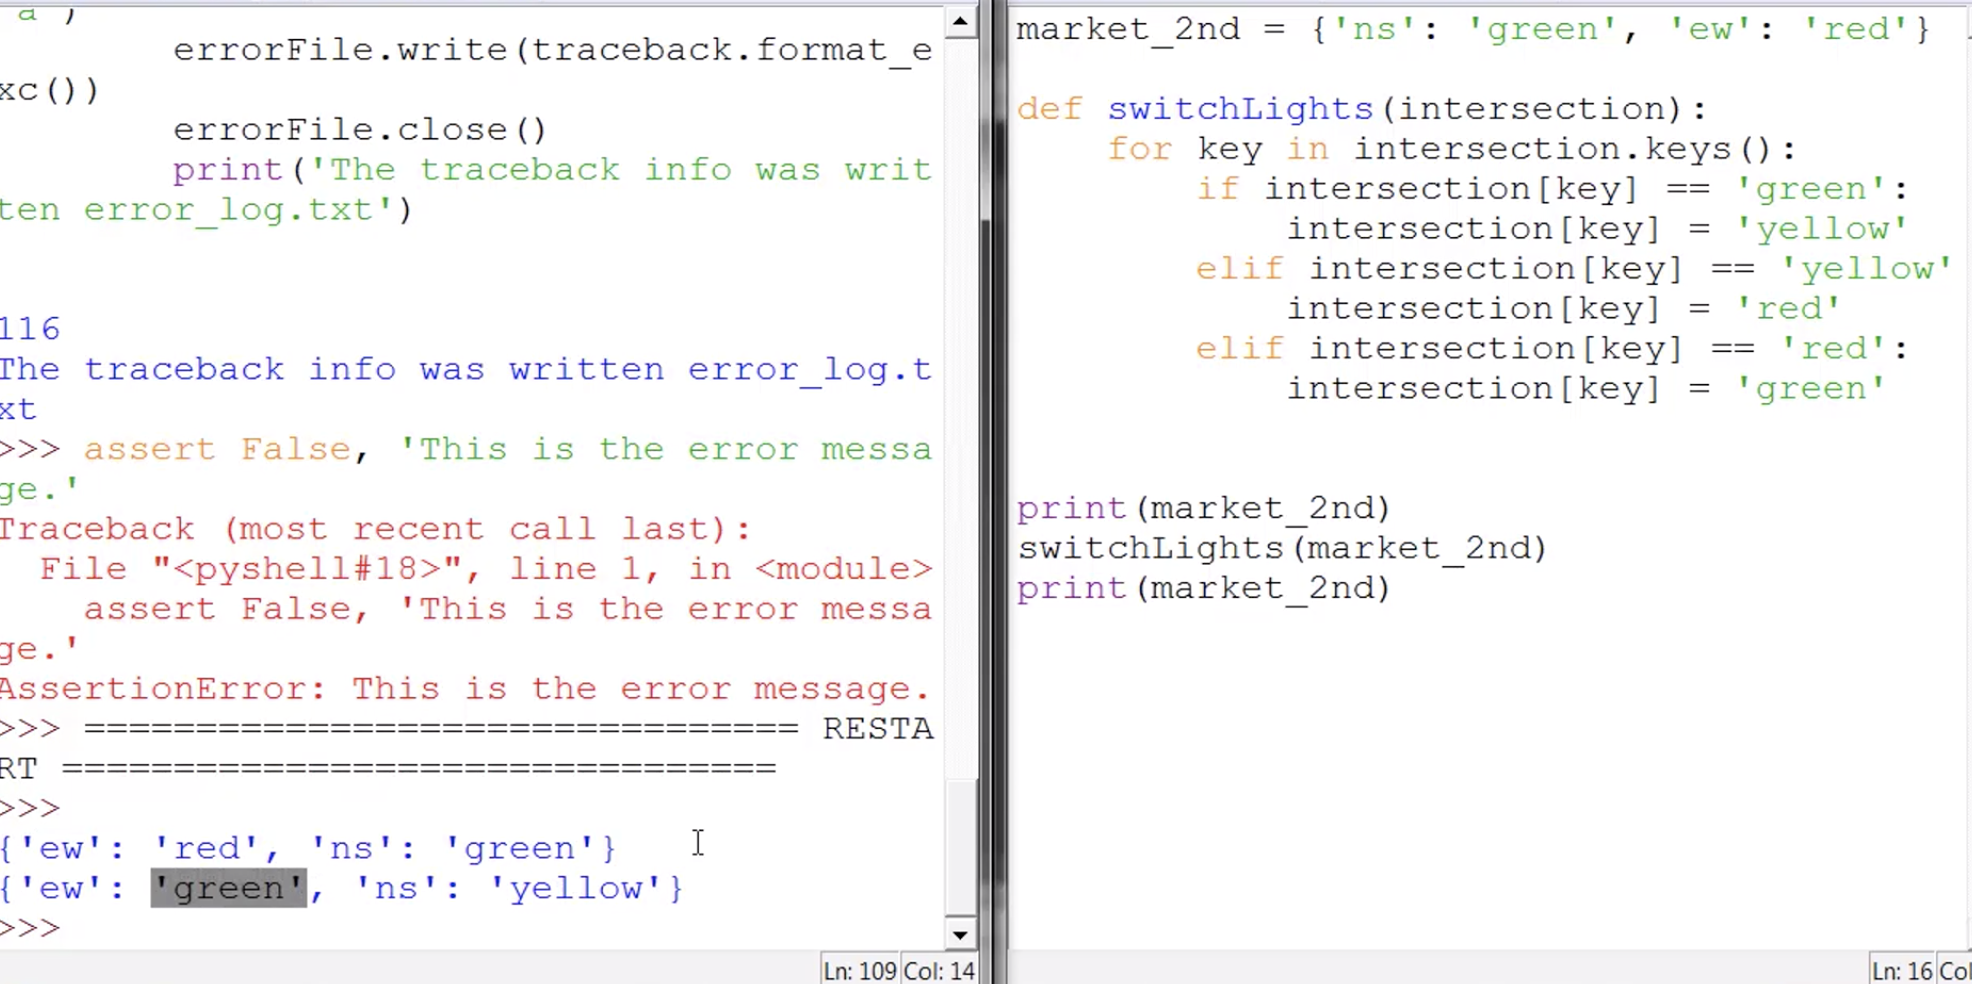

In [51]:
market_2nd = {
    'ns': 'green',
    'ew': 'red'
}

def switchLights(intersection):
    for key in intersection.keys():
        if intersection[key] == 'green':
            intersection[key] = 'yellow'
        elif intersection[key] == 'yellow':
            intersection[key] = 'red'
        elif intersection[key] == 'red':
            intersection[key] = 'green'
            
        assert 'red' in intersection.values(), 'Neither light is red!' + str(intersection)

In [52]:
switchLights(market_2nd)

AssertionError: Neither light is red!{'ns': 'yellow', 'ew': 'green'}

Screen Shot 2019-10-16 at 12.07.16 AM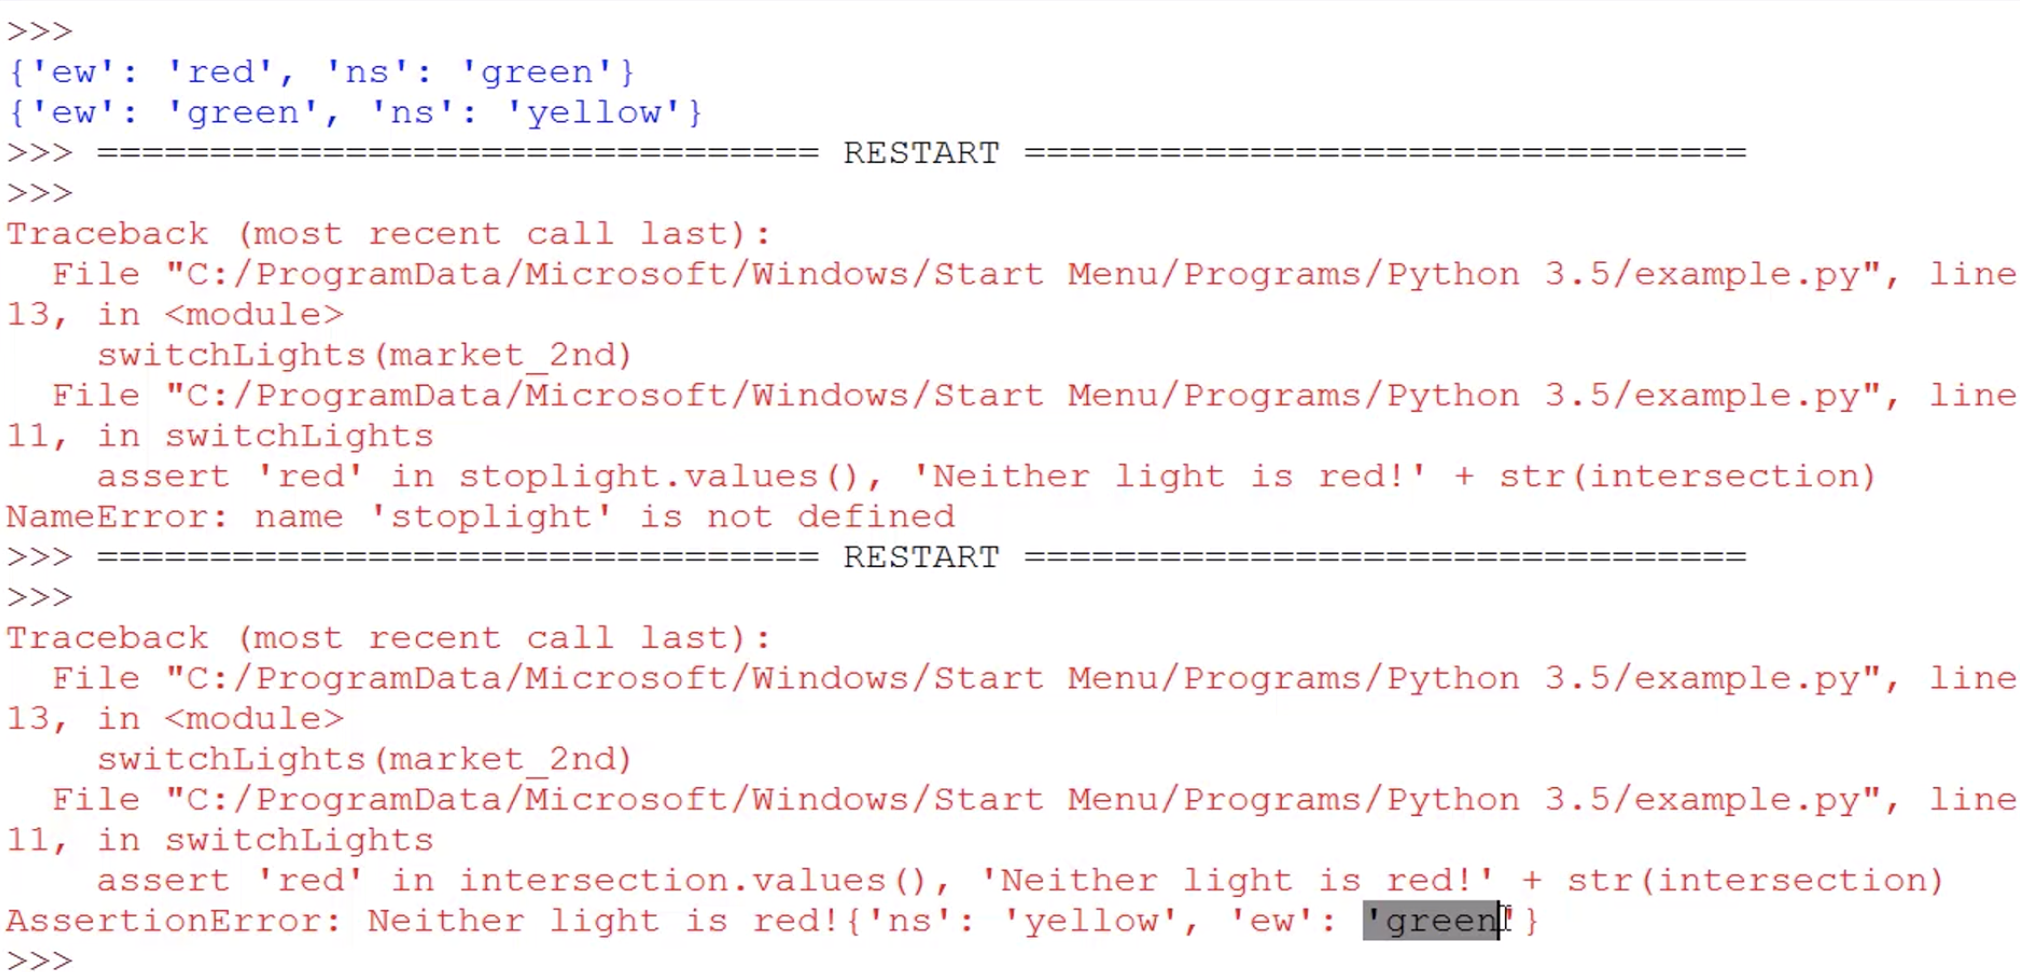

Lesson 35 Recap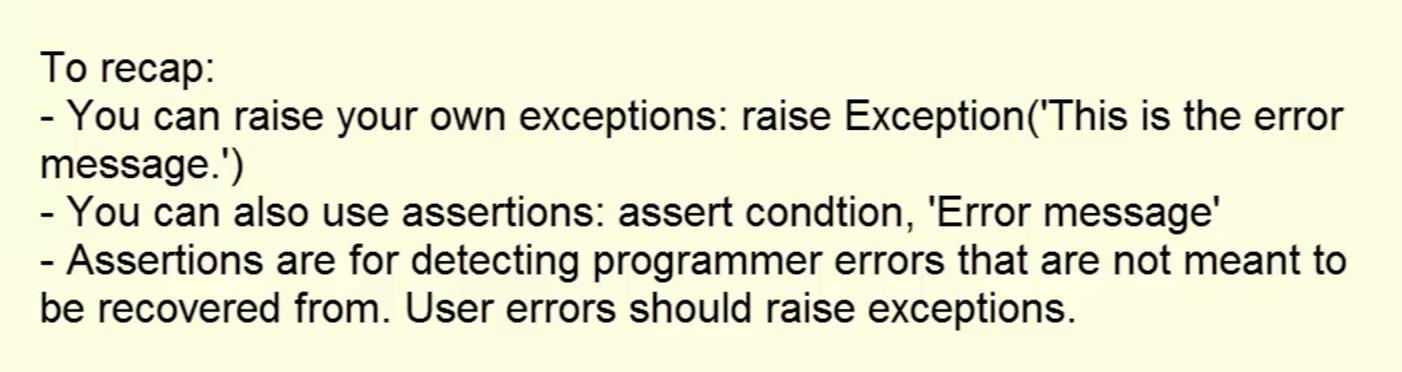

# LESSON 36: Logging to Debug

use Import logging

<b>LOG LEVELS</b>
- debug (lowest)
- info
- warning
- error
- critical (highest)

<b>ADD ERROR MESSAGE TO TEXT FILE</b>
- logging.basicConfig(filename='myProgramlog.txt', level=....)

In [54]:
import logging

logging.basicConfig(level=logging.DEBUG, format='%s(asctime)s - %(levelname)s - %(message)s')

### Example: Buggy Factorial Program

In [55]:
def factorial(n):
    total = 1
    for i in range(n + 1):
        total *= i
    return total

In [56]:
print(factorial(5))

0


It should not return a zero!

In [63]:
import logging
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s - %(levelname)s - %(message)s')
                    
logging.debug('Start of program')

def factorial(n):
    logging.debug('Start of factorial(%s)' % (n))
    total = 1
    
    for i in range(1, n + 1):
        total *= i
        logging.debug('i is %s, total is %s' % (i, total))
    
    logging.debug('Return value is %s' % (total))
    return total

print(factorial(5))
logging.debug('End of program')

{'name': 'root', 'msg': 'Start of program', 'args': (), 'levelname': 'DEBUG', 'levelno': 10, 'pathname': '<ipython-input-63-28cfd89905f2>', 'filename': '<ipython-input-63-28cfd89905f2>', 'module': '<ipython-input-63-28cfd89905f2>', 'exc_info': None, 'exc_text': None, 'stack_info': None, 'lineno': 4, 'funcName': '<module>', 'created': 1571199916.300915, 'msecs': 300.915002822876, 'relativeCreated': 6011214.08200264, 'thread': 4442240448, 'threadName': 'MainThread', 'processName': 'MainProcess', 'process': 76564, 'message': 'Start of program'}(asctime)s - DEBUG - Start of program
{'name': 'root', 'msg': 'Start of factorial(5)', 'args': (), 'levelname': 'DEBUG', 'levelno': 10, 'pathname': '<ipython-input-63-28cfd89905f2>', 'filename': '<ipython-input-63-28cfd89905f2>', 'module': '<ipython-input-63-28cfd89905f2>', 'exc_info': None, 'exc_text': None, 'stack_info': None, 'lineno': 7, 'funcName': 'factorial', 'created': 1571199916.304008, 'msecs': 304.00800704956055, 'relativeCreated': 601121

120


Screen Shot 2019-10-16 at 12.28.41 AM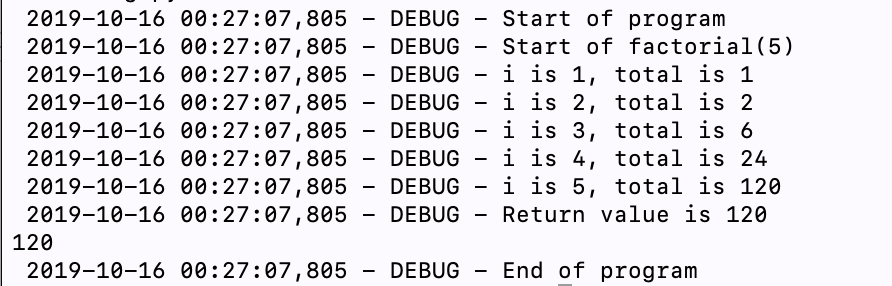

In [64]:
import logging
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s - %(levelname)s - %(message)s')

#Disable Logging
logging.disable(logging.CRITICAL)

logging.debug('Start of program')

def factorial(n):
    logging.debug('Start of factorial(%s)' % (n))
    total = 1
    
    for i in range(1, n + 1):
        total *= i
        logging.debug('i is %s, total is %s' % (i, total))
    
    logging.debug('Return value is %s' % (total))
    return total

print(factorial(5))
logging.debug('End of program')

120


In [75]:
import logging
logging.basicConfig(filename='myProgramLog.py', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
#Disable Logging
#logging.disable(logging.CRITICAL)

logging.debug('Start of program')

def factorial(n):
    logging.debug('Start of factorial(%s)' % (n))
    total = 1
    
    for i in range(1, n + 1):
        total *= i
        logging.debug('i is %s, total is %s' % (i, total))
    
    logging.debug('Return value is %s' % (total))
    return total

print(factorial(5))
logging.debug('End of program')

120


Screen Shot 2019-10-16 at 12.41.45 AM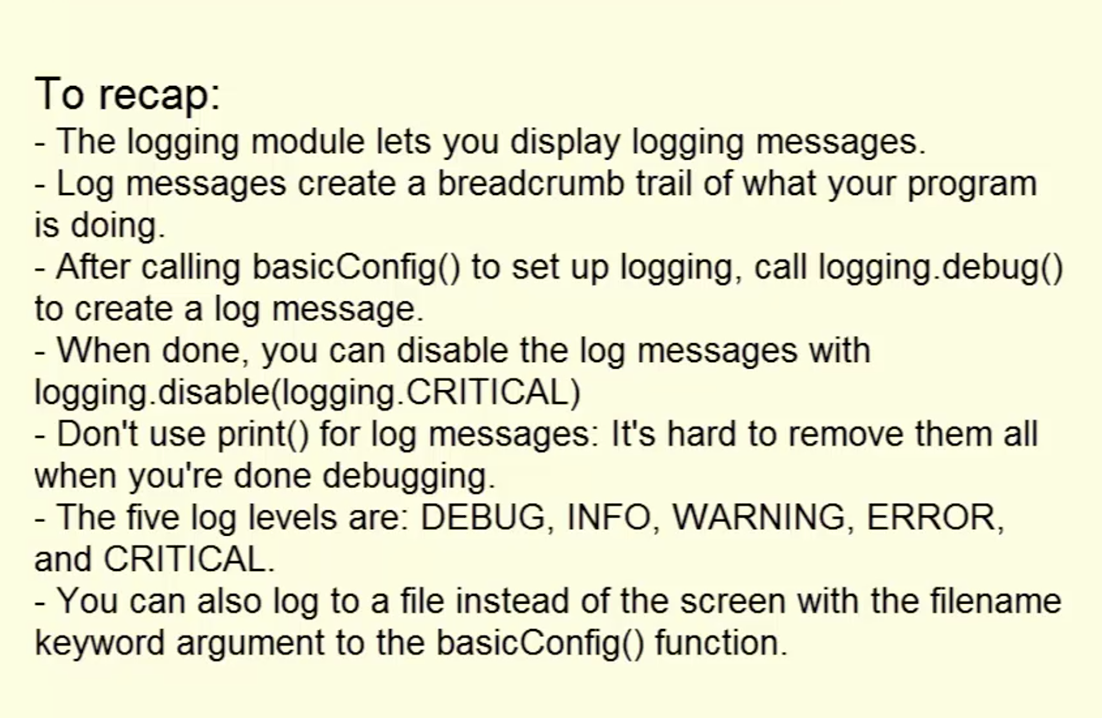

# LESSON 37: Using IDLE Debugger

The debugger is a feature of IDLE that allows you to execute your program one line at a time. The debugger will run a single line of code and then wait for you to tell it to continue. By running your program “under the debugger” like this, you can take as much time as you want to examine the values in the variables at any given point during the program’s lifetime. This is a valuable tool for tracking down bugs.

In [76]:
import lldb

ModuleNotFoundError: No module named 'lldb'